# Demo - Time Series Forecasting with TabPFN  🎉

Welcome to the demo of TabPFN for time series forecasting!

In this demo, we will show you how to use TabPFN for time series forecasting. Concretely, we will:

1. **Load time series data** -- you can also bring in time series data from your own problem
2. **Add features** -- we will use default features, but feel free to experiment with your own features!
3. **Perform prediction** -- zero-shot! 😉
4. **Visualize the forecasting results**


In [45]:
!python Lag_patch_exp1.py

Figure(1000x300)
GPU 0:: 100%|█████████████████████████████████████| 1/1 [00:01<00:00,  1.19s/it]
Figure(1000x300)
ID: 0, PATHC: True, clean_mase: 4.440886097779791
Figure(1000x300)
GPU 0:: 100%|█████████████████████████████████████| 1/1 [00:00<00:00,  2.43it/s]
Figure(1000x300)
ID: 1, PATHC: True, clean_mase: 1.727412085484475
Figure(1000x300)
GPU 0:: 100%|█████████████████████████████████████| 1/1 [00:00<00:00,  2.08it/s]
Figure(1000x300)
ID: 2, PATHC: True, clean_mase: 1.985550848577781
Figure(1000x300)
GPU 0:: 100%|█████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]
Figure(1000x300)
ID: 3, PATHC: True, clean_mase: 2.0085510781154388
Figure(1000x300)
GPU 0:: 100%|█████████████████████████████████████| 1/1 [00:00<00:00,  2.15it/s]
Figure(1000x300)
ID: 4, PATHC: True, clean_mase: 3.784263086491515
Figure(1000x300)
GPU 0:: 100%|█████████████████████████████████████| 1/1 [00:00<00:00,  2.10it/s]
Figure(1000x300)
ID: 5, PATHC: True, clean_mase: 2.3934255942508127
Figure(1

## Setup

In [44]:
tsdf['target'].to_numpy().shape

(4046,)

In [1]:
# !pip install tabpfn-time-series>=1.0.0

## Load Time Series Data

In this demo, we will use the time series dataset from [Chronos Dataset](https://huggingface.co/datasets/autogluon/chronos_datasets) on HuggingFace. Also, we'll keep it short and work with just 2 time series from the dataset.

Feel free to explore other datasets by using the dataset names from Chronos Dataset on HuggingFace or even use time series data of your own problem.

In [3]:
dataset_metadata = {
    "monash_tourism_monthly": {"prediction_length": 24}, # {"prediction_length": 24},
    "m4_hourly": {"prediction_length": 48},
    "electricity_15min": {"prediction_length": 48},
}

dataset_choice = "monash_tourism_monthly"
num_time_series_subset = 16

In [4]:
from datasets import load_dataset
from autogluon.timeseries import TimeSeriesDataFrame

from tabpfn_time_series.data_preparation import to_gluonts_univariate, generate_test_X

prediction_length = dataset_metadata[dataset_choice]['prediction_length']
dataset = load_dataset("autogluon/chronos_datasets", dataset_choice)

tsdf = TimeSeriesDataFrame(to_gluonts_univariate(dataset['train']))
tsdf = tsdf[tsdf.index.get_level_values('item_id').isin(tsdf.item_ids[:num_time_series_subset])]
train_tsdf, test_tsdf_ground_truth = tsdf.train_test_split(prediction_length=prediction_length)
test_tsdf = generate_test_X(train_tsdf, prediction_length)

In [4]:
# tsdf = TimeSeriesDataFrame(to_gluonts_univariate(dataset['train']))
# tsdf.item_ids

Let's take a look at the time series data.

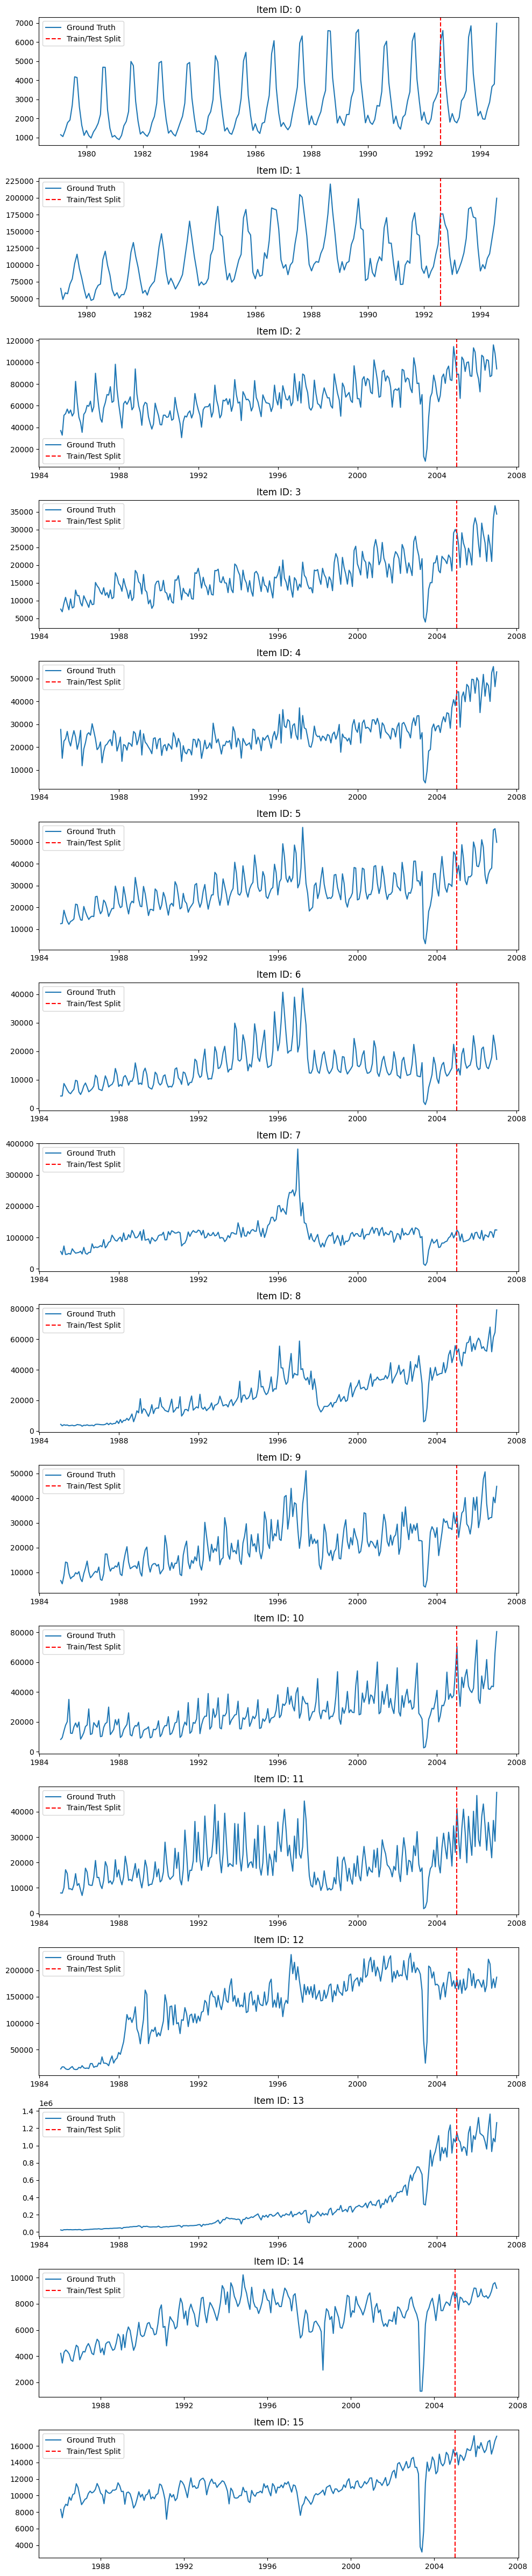

In [5]:
from tabpfn_time_series.plot import plot_actual_ts

plot_actual_ts(train_tsdf,
               test_tsdf_ground_truth)

## Patching

In [ ]:
# import matplotlib.pyplot as plt
# import torch
# import numpy as np

# X = torch.from_numpy(test_tsdf_ground_truth.xs(0, level="item_id")["target"].to_numpy())

# plt.plot(np.arange(len(X)), X)
# plt.plot(np.arange(len(X))[-int(len(X)*0.1):], X[-int(len(X)*0.1):])

In [ ]:
# int(len(X)*0.1)

In [8]:
# X_train = look_before(X[:-int(len(X)*0.1), None], 4)
# Y_train = X[:-int(len(X)*0.1), None]
# print(X_train.shape, Y_train.shape)

# X_test = torch.full((N, patch_size), float("nan"), dtype=X.dtype, device=X.device)
# Y_test = X[-int(len(X)*0.1):, None]
# print(X_test.shape, Y_test.shape)


# # X_train = look_before(X[:, None], 4)






# # X_train = look_before(X[:, None], 4)

In [9]:
# import torch


# def create_lag_matrix(series: torch.Tensor, window_size: int) -> torch.Tensor:
#     """
#     Build lag features for a 1D time series.

#     Each row i contains values from indices (i - 2*window_size + 1) to (i - window_size),
#     padded with NaN where indices are out of bounds.

#     Args:
#         series (torch.Tensor): 1D tensor of shape (T,) or (T, 1).
#         window_size (int): Number of lag steps.

#     Returns:
#         torch.Tensor: Tensor of shape (T, window_size) with lagged features.
#     """
#     # Ensure a flat 1D tensor
#     if series.ndim == 2 and series.size(1) == 1:
#         series = series.squeeze(1)

#     length = series.size(0)
#     lags = torch.full(
#         (length, window_size),
#         float("nan"),
#         dtype=series.dtype,
#         device=series.device,
#     )

#     for idx in range(length):
#         start = idx - 2 * window_size + 1
#         end = idx - window_size

#         if end >= 0:
#             valid_start = max(start, 0)
#             window_vals = series[valid_start : end + 1]

#             pad = window_size - window_vals.size(0)
#             if pad > 0:
#                 lags[idx, pad:] = window_vals
#             else:
#                 lags[idx] = window_vals

#     return lags


# # Example usage:
# if __name__ == "__main__":
#     # Simulate 11 training + 4 test rows
#     train = torch.arange(1, 12, dtype=torch.float)
#     test = torch.arange(12, 16, dtype=torch.float)
#     full_series = torch.cat([train, test], dim=0)

#     # print(train)
#     # print(test)
#     print(full_series)
#     print(create_lag_matrix(full_series, window_size=4))


In [10]:
# import torch

# # sample data
# X = torch.arange(10, dtype=torch.float32).unsqueeze(1)  # shape [10, 1]

# # look-before patches with patch_size=4
# M = look_before(X, patch_size=4)
# print(M)


In [11]:
# from dataclasses import dataclass, field

# @dataclass
# class _Patcher:
#     patch_size: int
#     patch_stride: int
#     left_pad: bool

#     def __post_init__(self):
#         assert self.patch_size % self.patch_stride == 0

#     def __call__(self, x: torch.Tensor) -> torch.Tensor:
#         assert x.ndim == 2
#         length = x.shape[-1]

#         if length < self.patch_size or (length % self.patch_stride != 0):
#             if length < self.patch_size:
#                 padding_size = (
#                     *x.shape[:-1],
#                     self.patch_size - (length % self.patch_size),
#                 )
#             else:
#                 padding_size = (
#                     *x.shape[:-1],
#                     self.patch_stride - (length % self.patch_stride),
#                 )
#             padding = torch.full(size=padding_size, fill_value=torch.nan, dtype=x.dtype, device=x.device)
#             if self.left_pad:
#                 x = torch.concat((padding, x), dim=-1)
#             else:
#                 x = torch.concat((x, padding), dim=-1)

#         x = x.unfold(dimension=-1, size=self.patch_size, step=self.patch_stride)
#         return x

In [12]:
# X.shape

In [13]:
# patcher = _Patcher(4, 4, left_pad=True)
# x_patched = patcher(X[:, None])
# print(X.shape, x_patched.shape)
# # print(X)
# print(x_patched)

## Adding Features

In our paper, we propose adding `Running Index`, `Calendar Features`, and `Auto Seasonal Features` to the table.

**Feel free to experiment with your own features!**

To do that, simply define your own feature functions and pass them to the `FeatureTransformer`.

### Without Patching

In [6]:
from tabpfn_time_series import FeatureTransformer
from tabpfn_time_series.features import (
    RunningIndexFeature,
    CalendarFeature,
    AutoSeasonalFeature,
)
from patch_features import PatchingFeature

selected_features = [
    RunningIndexFeature(),
    CalendarFeature(),
    AutoSeasonalFeature(),
    # PatchingFeature(),
]

feature_transformer = FeatureTransformer(selected_features)

train_tsdf, test_tsdf = feature_transformer.transform(train_tsdf, test_tsdf)


Let's take a look at the tables (train and test) before we proceed to do predictions.

✅ Realize that we have added some features into the tables.

In [7]:
# train_tsdf.head()

In [8]:
# test_tsdf.head()

## Prediction

Now, let's perform prediction.

We provide two options, `TabPFNMode.LOCAL` and `TabPFNMode.CLIENT`, as the backend for TabPFN.

- `TabPFNMode.LOCAL` uses your local machine to run TabPFN.
- `TabPFNMode.CLIENT` uses TabPFN's inference service provided by [tabpfn-client](https://github.com/automl/tabpfn-client)

For this demo, we'll use `TabPFNMode.CLIENT` to perform prediction. If you have not use the client before, you'll be prompted to create an account.

Note: if your machine doesn't have a GPU, using `TabPFNMode.CLIENT` is recommended -- must faster 😉.


In [37]:
from tabpfn_time_series import TabPFNTimeSeriesPredictor, TabPFNMode

predictor = TabPFNTimeSeriesPredictor(
    tabpfn_mode=TabPFNMode.LOCAL,
)

pred = predictor.predict(train_tsdf, test_tsdf)

GPU 0:: 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]


## Visualize the Results

Let's visualize the forecasting results.

Also, note that we provide both **point prediction** and **quantile prediction**, how amazing! 😄

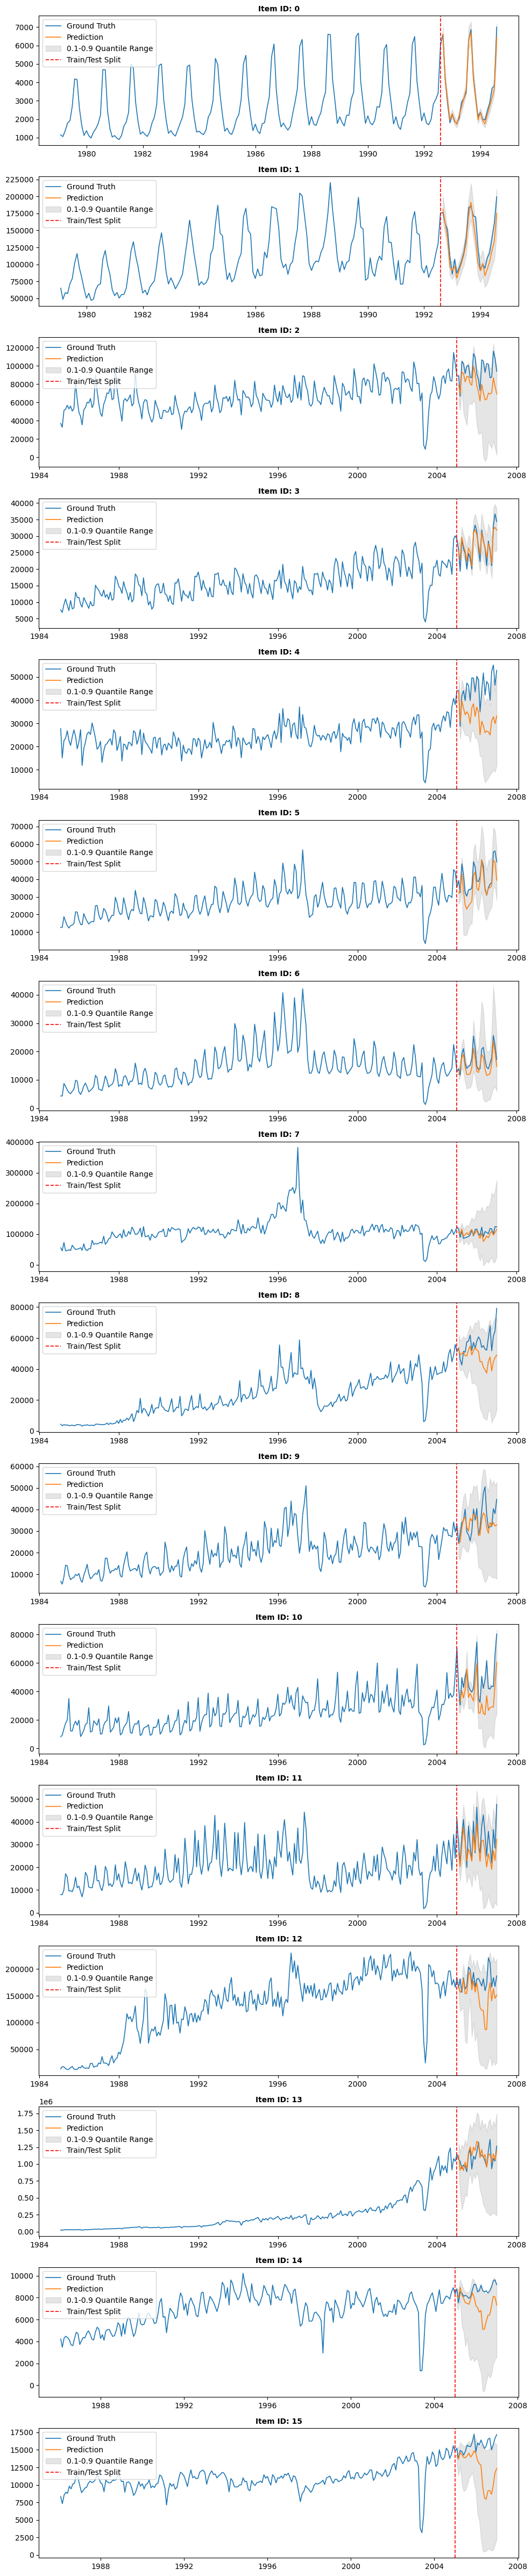

In [10]:
from tabpfn_time_series.plot import plot_pred_and_actual_ts

plot_pred_and_actual_ts(
    train=train_tsdf,
    test=test_tsdf_ground_truth,
    pred=pred,
)

In [39]:
# Debug prints to understand the data better
print("Prediction shape:", pred.shape)
print("Ground truth shape:", test_tsdf_ground_truth.shape)

# Check if timestamps align
pred_times = set(pred.index.get_level_values('timestamp'))
truth_times = set(test_tsdf_ground_truth.index.get_level_values('timestamp'))
common_times = pred_times.intersection(truth_times)
print(f"Number of common timestamps: {len(common_times)}")

# Try computing MASE only on the overlapping period
test_slice = test_tsdf_ground_truth[test_tsdf_ground_truth.index.get_level_values('timestamp').isin(pred_times)]
pred_slice = pred[['target']]

clean_mase = MASEComputer.compute_metric(
    data_future=test_slice,
    predictions=pred_slice,
)

print("MASE score:", clean_mase)

Prediction shape: (384, 10)
Ground truth shape: (4046, 1)
Number of common timestamps: 48


KeyError: 'mean'

In [38]:
# # Create a simplified prediction DataFrame with just the required columns
# simplified_pred = pred[['mean']].copy()
pred['mean'] = pred['target']

# # Recompute MASE with simplified predictions
clean_mase = MASEComputer.compute_metric(
    data_future=test_tsdf_ground_truth.slice_by_timestep(-prediction_length -1, -1),
    predictions=pred,
)

KeyError: 'mean'

In [36]:
from autogluon.timeseries.metrics.point import MASE
from autogluon.timeseries.utils.datetime import get_seasonality


MASEComputer = MASE()
MASEComputer.clear_past_metrics()

# pred["mean"] = pred["target"]
all_noisy_preds = pred
# Set mean for all noisy predictions
# for noise_level, noisy_pred in all_noisy_preds.items():
#     print(all_noisy_preds[noise_level])
#     all_noisy_preds[noise_level]["mean"] = all_noisy_preds[noise_level]["target"]

MASEComputer.save_past_metrics(
    data_past=train_tsdf,
    seasonal_period=get_seasonality(train_tsdf.freq),
)

clean_mase = MASEComputer.compute_metric(
    data_future=test_tsdf_ground_truth.slice_by_timestep(-prediction_length -1, -1),
    predictions=pred[['target']],
)

# Compute MASE for all noise levels
# noisy_mase_results = {}
# for noise_level, noisy_pred in all_noisy_preds.items():
#     noisy_mase_results[noise_level] = MASEComputer.compute_metric(
#         data_future=test_tsdf_ground_truth.slice_by_timestep(-prediction_length -1, -1),
#         predictions=noisy_pred,
#     )

# # Return clean MASE and dictionary of noisy MASE results
# # clean_mase, 
# noisy_mase_results

KeyError: 'mean'

### With Patching

In [31]:

from datasets import load_dataset
from autogluon.timeseries import TimeSeriesDataFrame

from tabpfn_time_series.data_preparation import to_gluonts_univariate, generate_test_X

prediction_length = dataset_metadata[dataset_choice]['prediction_length']
dataset = load_dataset("autogluon/chronos_datasets", dataset_choice)

tsdf = TimeSeriesDataFrame(to_gluonts_univariate(dataset['train']))
tsdf = tsdf[tsdf.index.get_level_values('item_id').isin(tsdf.item_ids[:num_time_series_subset])]
train_tsdf, test_tsdf_ground_truth = tsdf.train_test_split(prediction_length=prediction_length)
test_tsdf = generate_test_X(train_tsdf, prediction_length)




from tabpfn_time_series import FeatureTransformer
from tabpfn_time_series.features import (
    RunningIndexFeature,
    CalendarFeature,
    AutoSeasonalFeature,
)
from patch_features import PatchingFeature

selected_features = [
    RunningIndexFeature(),
    CalendarFeature(),
    AutoSeasonalFeature(),
    PatchingFeature(),
]

feature_transformer = FeatureTransformer(selected_features)

train_tsdf, test_tsdf = feature_transformer.transform(train_tsdf, test_tsdf)


from tabpfn_time_series import TabPFNTimeSeriesPredictor, TabPFNMode

predictor = TabPFNTimeSeriesPredictor(
    tabpfn_mode=TabPFNMode.LOCAL,
)

pred = predictor.predict(train_tsdf, test_tsdf)


from tabpfn_time_series import TabPFNTimeSeriesPredictor, TabPFNMode

predictor = TabPFNTimeSeriesPredictor(
    tabpfn_mode=TabPFNMode.LOCAL,
)

pred = predictor.predict(train_tsdf, test_tsdf)


In [ ]:
from autogluon.timeseries.metrics.point import MASE
from autogluon.timeseries.utils.datetime import get_seasonality


MASEComputer = MASE()
MASEComputer.clear_past_metrics()

pred["mean"] = pred["target"]


MASEComputer.save_past_metrics(
    data_past=train_tsdf,
    seasonal_period=get_seasonality(train_tsdf.freq),
)

# print(f"get_seasonality(train_tsdf.freq): {get_seasonality(train_tsdf.freq)}")

clean_mase = MASEComputer.compute_metric(
    data_future=test_tsdf_ground_truth.slice_by_timestep(-prediction_length -1, -1),
    predictions=pred,
)

clean_mase

In [33]:
from tabpfn_time_series.plot import plot_pred_and_actual_ts

plot_pred_and_actual_ts(
    train=train_tsdf,
    test=test_tsdf_ground_truth,
    pred=pred,
)

In [34]:
# test_tsdf_ground_truth.slice_by_timestep(-prediction_length -1, -1)
# len(pred["mean"])



# Feedback

Let us know what you think!

Write us at Discord: https://discord.gg/qK7AaXPN or just simply create an issue on [GitHub](https://github.com/liam-sbhoo/tabpfn-time-series/tree/main).

Thank you for trying out our method! 🎉
